In [1]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import matplotlib.pyplot as plt
import glob

In [14]:
files = glob.glob('../files/S00*/*.edf')

In [15]:
len(files)

126

In [16]:
raws = [read_raw_edf(f, preload=True, stim_channel='auto') for f in files]
raw_obj = concatenate_raws(raws)

Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.9

In [4]:
raw = raw_obj.copy()

In [6]:
events, event_dict = mne.events_from_annotations(raw)
print(raw.info)
print(event_dict)

Used Annotations descriptions: ['T0', 'T1', 'T2']
<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>
{'T0': 1, 'T1': 2, 'T2': 3}


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 339 unique labels.


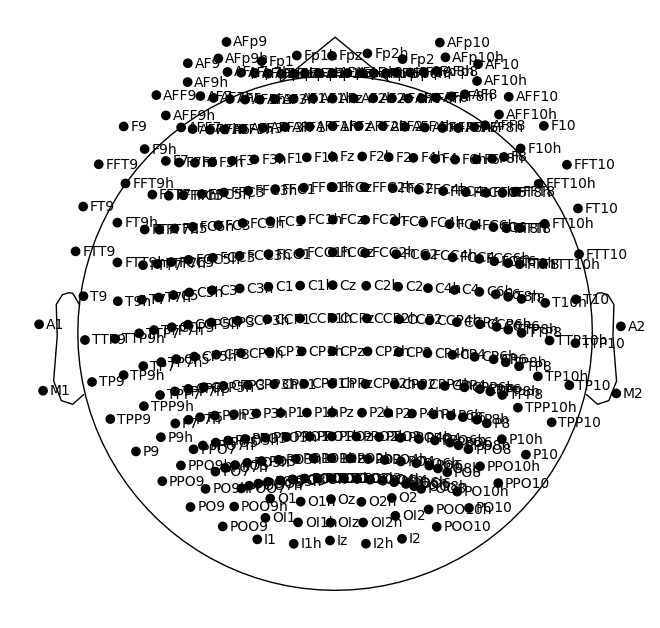

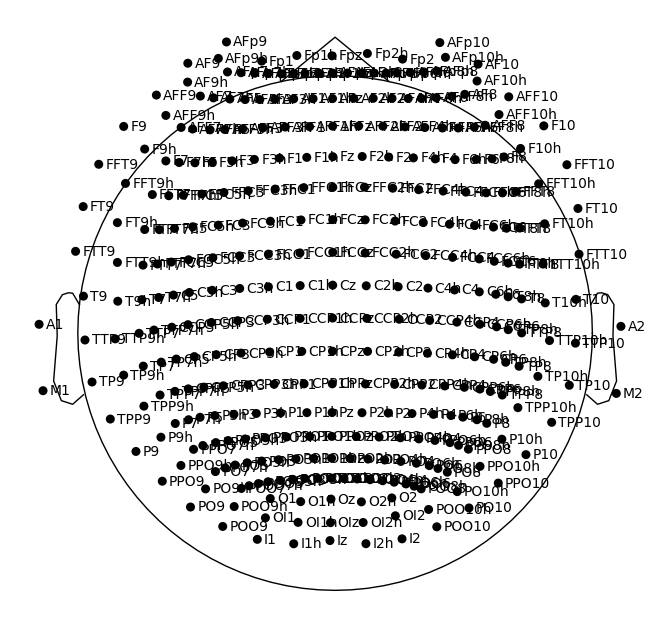

In [11]:
montage = mne.channels.make_standard_montage('standard_1005')
montage.plot()

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6


Plotting 339 unique labels.


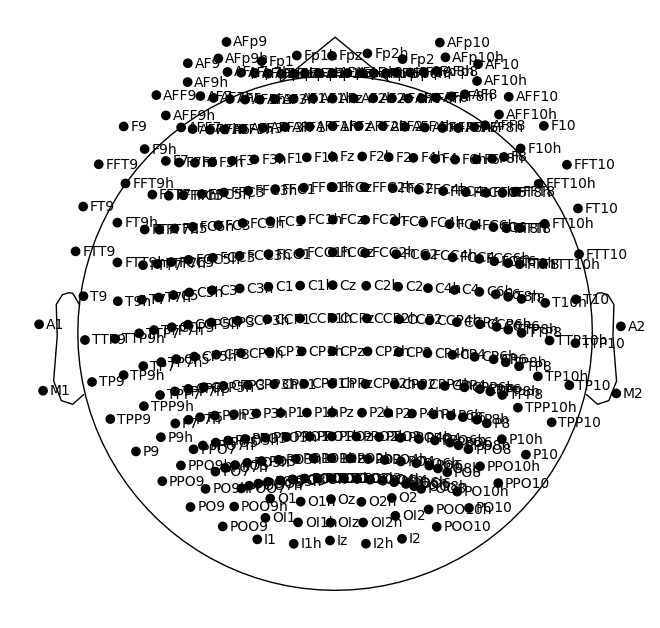

<RawEDF | S001R08.edf, 64 x 259520 (1622.0 s), ~126.8 MB, data loaded>

In [12]:
eegbci.standardize(raw) # Standardize channel positions and names.
montage = mne.channels.make_standard_montage('standard_1005')
montage.plot()
raw.set_montage(montage)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


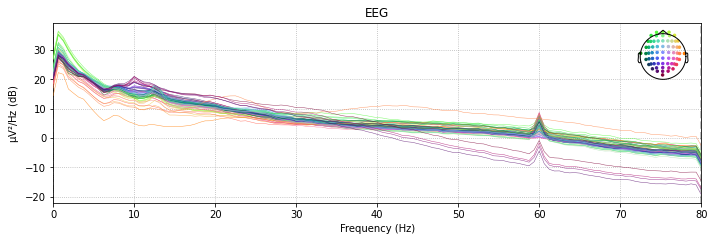

In [9]:
raw.plot_psd()
plt.show()